In [14]:
import numpy as np
from regain.data.base import load_Petrobras
from regain.hmm.higher_order_hmm_graphical_lasso import HMM_GraphicalLasso
from regain.hmm.utils import corr_plot,plot_results_cluster,cov2corr,cluster_returns_recap
import matplotlib.pyplot as plt
from decimal import Decimal

/Users/federicociech/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
Petrob, BrazCurr,WTI = load_Petrobras()
print(Petrob, BrazCurr,WTI)

           Ultimo Apertura Massimo Minimo    Vol.   Var. %
Data                                                      
20.03.2020  12,22    13,15   13,47  11,85  38,67M   -1,85%
19.03.2020  12,45    11,00   13,05  10,50  68,11M   12,67%
18.03.2020  11,05    11,70   12,20  10,50  73,47M  -15,52%
17.03.2020  13,08    13,66   14,11  13,00  53,01M   -0,38%
16.03.2020  13,13    13,99   14,67  13,10  39,54M  -17,21%
...           ...      ...     ...    ...     ...      ...
28.02.2007  19,57    19,71   19,83  19,30   5,30M   -0,31%
27.02.2007  19,63    19,69   20,10  19,42   4,73M   -4,43%
26.02.2007  20,54    20,54   20,71  20,51   1,75M    0,44%
23.02.2007  20,45    20,43   20,69  20,41   2,88M    0,44%
22.02.2007  20,36    20,20   20,40  20,08   3,31M    1,39%

[3233 rows x 6 columns]             Ultimo Apertura Massimo  Minimo  Var. %
Data                                               
20.03.2020  5,0640   5,0010  5,0662  4,9820  -0,63%
19.03.2020  5,0960   5,1098  5,2140  5,0682  -0,23%


In [16]:
ind_WTI = np.zeros(np.size(WTI.index),bool)

for i,date in enumerate(WTI.index):
    ind_WTI[i] = np.any(Petrob.index==date)
print(np.sum(ind_WTI))

New_Dates = WTI.index[ind_WTI]



ind_braz = np.zeros(np.size(BrazCurr.index),bool)

for i,date in enumerate(BrazCurr.index):
    ind_braz[i] = np.any(New_Dates==date)
print(np.sum(ind_braz))
 
ind_Petr = np.zeros(np.size(Petrob.index),bool)

for i,date in enumerate(Petrob.index):
    ind_Petr[i] = np.any(New_Dates==date)
print(np.sum(ind_Petr))

3198
3198
3198


In [27]:
New_Dates[0]

'20.03.2020'

In [32]:
from datetime import datetime
dates_list = []
for i in range(np.size(New_Dates)-1,0,-1):
    
    date_str = New_Dates[i]

    date_object = datetime.strptime(date_str, '%d.%m.%Y').date()
    dates_list.append(date_object)
print(dates_list)

[datetime.date(2007, 2, 22), datetime.date(2007, 2, 23), datetime.date(2007, 2, 26), datetime.date(2007, 2, 27), datetime.date(2007, 2, 28), datetime.date(2007, 3, 1), datetime.date(2007, 3, 2), datetime.date(2007, 3, 5), datetime.date(2007, 3, 6), datetime.date(2007, 3, 7), datetime.date(2007, 3, 8), datetime.date(2007, 3, 9), datetime.date(2007, 3, 12), datetime.date(2007, 3, 13), datetime.date(2007, 3, 14), datetime.date(2007, 3, 15), datetime.date(2007, 3, 16), datetime.date(2007, 3, 19), datetime.date(2007, 3, 20), datetime.date(2007, 3, 21), datetime.date(2007, 3, 22), datetime.date(2007, 3, 23), datetime.date(2007, 3, 26), datetime.date(2007, 3, 27), datetime.date(2007, 3, 28), datetime.date(2007, 3, 29), datetime.date(2007, 3, 30), datetime.date(2007, 4, 2), datetime.date(2007, 4, 3), datetime.date(2007, 4, 4), datetime.date(2007, 4, 5), datetime.date(2007, 4, 9), datetime.date(2007, 4, 10), datetime.date(2007, 4, 11), datetime.date(2007, 4, 12), datetime.date(2007, 4, 13), dat

In [18]:
BrazCurr_filt = BrazCurr['Ultimo'].values[ind_braz]
WTI_filt = WTI['Ultimo'].values[ind_WTI]
Petrob_filt = Petrob['Ultimo'].values[ind_Petr]
data = np.zeros((np.size(BrazCurr_filt),3))

for i in range(np.size(BrazCurr_filt)):
    data[i,0] = float(BrazCurr_filt[i].replace(',','.'))
    data[i,1] = float(Petrob_filt[i].replace(',','.'))
    data[i,2] = float(WTI_filt[i].replace(',','.'))



In [19]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data[i,:]-data[i-1,:])/data[i-1,:]*100

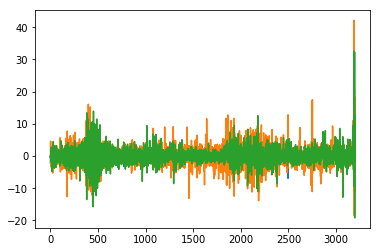

In [20]:
returns_mat = np.flip(returns_mat,axis=0)

plt.plot(returns_mat)

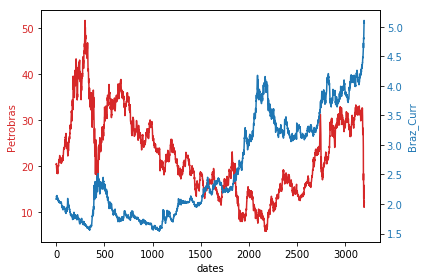

In [21]:
data = np.flip(data,axis=0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('Petrobras', color=color)
ax1.plot( data[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Braz_Curr', color=color)  # we already handled the x-label with ax1
ax2.plot( data[:,0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

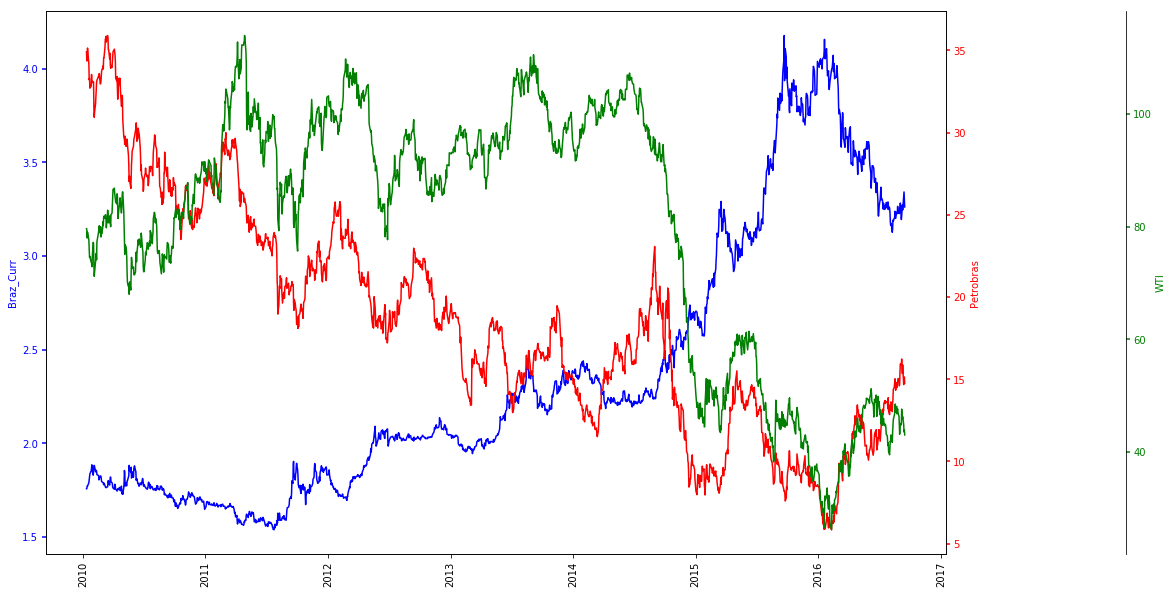

In [59]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots(figsize=(20, 10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(dates,data[-2500:-865,0], "b-", label="Braz_Curr")
p2, = par1.plot(dates,data[-2500:-865,1], "r-", label="Petrobras")
p3, = par2.plot(dates,data[-2500:-865,2], "g-", label="WTI")


host.set_ylabel("Braz_Curr")
par1.set_ylabel("Petrobras")
par2.set_ylabel("WTI")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
degrees = 90
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x',labelrotation=degrees)

lines = [p1, p2, p3]

#host.legend(lines, [l.get_label() for l in lines],loc='lower right', bbox_to_anchor=(1, 0.5))

plt.show()


In [1]:
import pickle
with open('res.pickle', 'rb') as f:
    [res_pred,res_today,res_emp] =  pickle.load(f)

In [2]:
import matplotlib.pyplot as plt

Text(0,0.5,'Percent of capital\n')

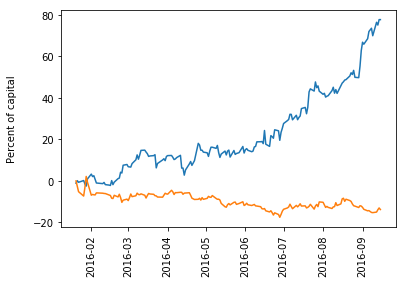

In [66]:
import numpy as np
plt.plot(dates[-165:],np.cumsum(res_pred)/1000)
plt.plot(dates[-165:],np.cumsum(res_emp)/1000)
degrees = 90
plt.xticks(rotation=degrees)

plt.ylabel("Percent of capital\n")

In [35]:
dates = dates_list[-2500:-865]
len(dates)

1635